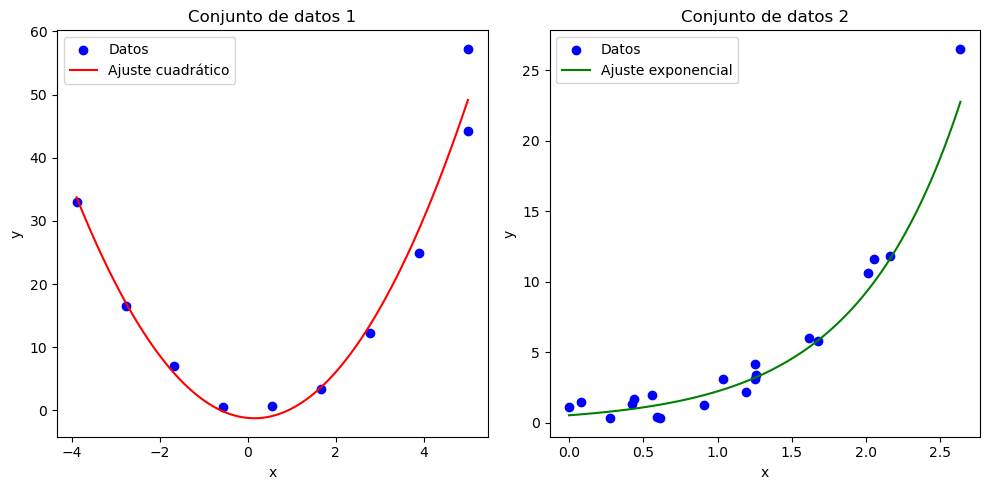

Coeficientes del ajuste cuadrático (conjunto 1):
a2 = 2.1433, a1 = -0.6456, a0 = -1.2032
y(2.25) = 8.1945, y(-2.25) = 11.0997

Coeficientes del ajuste exponencial (conjunto 2):
a = 0.5441, b = 1.4172
y(5) = 650.1174, y(1) = 2.2446


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Datos del conjunto 1
x1 = np.array([5.0000,
    -3.8889,
    -2.7778,
    -1.6667,
    -0.5556,
    0.5556,
    1.6667,
    2.7778,
    3.8889,
    5.0000,])
y1 = np.array([57.2441,
    33.0303,
    16.4817,
    7.0299,
    0.5498,
    0.7117,
    3.4185,
    12.1767,
    24.9167,
    44.2495,])

# Datos del conjunto 2
x2 = np.array([ 0.0003,
    0.0822,
    0.2770,
    0.4212,
    0.4403,
    0.5588,
    0.5943,
    0.6134,
    0.9070,
    1.0367,
    1.1903,
    1.2511,
    1.2519,
    1.2576,
    1.6165,
    1.6761,
    2.0114,
    2.0557,
    2.1610,
    2.6344,])
y2 = np.array([1.1017,
    1.5021,
    0.3844,
    1.3251,
    1.7206,
    1.9453,
    0.3894,
    0.3328,
    1.2887,
    3.1239,
    2.1778,
    3.1078,
    4.1856,
    3.3640,
    6.0330,
    5.8088,
    10.5890,
    11.5865,
    11.8221,
    26.5077,])

# Función de ajuste cuadrático para el conjunto 1
def ajuste_cuadratico(x, y):
    A = np.vstack([x**2, x, np.ones_like(x)]).T
    coeficientes = np.linalg.lstsq(A, y, rcond=None)[0]
    return coeficientes

# Función de ajuste exponencial para el conjunto 2
def ajuste_exponencial(x, y):
    log_y = np.log(y)
    A = np.vstack([x, np.ones_like(x)]).T
    coeficientes = np.linalg.lstsq(A, log_y, rcond=None)[0]
    return coeficientes

# Calcular coeficientes para el conjunto 1
coef_cuad = ajuste_cuadratico(x1, y1)

# Calcular coeficientes para el conjunto 2
coef_exp = ajuste_exponencial(x2, y2)

# Funciones ajustadas
f1 = lambda x: coef_cuad[0]*x**2 + coef_cuad[1]*x + coef_cuad[2]
f2 = lambda x: np.exp(coef_exp[1]) * np.exp(coef_exp[0]*x)

# Graficar conjunto 1
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(x1, y1, color="blue", label="Datos")
x1_fit = np.linspace(min(x1), max(x1), 100)
plt.plot(x1_fit, f1(x1_fit), color="red", label="Ajuste cuadrático")
plt.title("Conjunto de datos 1")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

# Graficar conjunto 2
plt.subplot(1, 2, 2)
plt.scatter(x2, y2, color="blue", label="Datos")
x2_fit = np.linspace(min(x2), max(x2), 100)
plt.plot(x2_fit, f2(x2_fit), color="green", label="Ajuste exponencial")
plt.title("Conjunto de datos 2")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

plt.tight_layout()
plt.show()

# Valores calculados
print("Coeficientes del ajuste cuadrático (conjunto 1):")
print(f"a2 = {coef_cuad[0]:.4f}, a1 = {coef_cuad[1]:.4f}, a0 = {coef_cuad[2]:.4f}")
print(f"y(2.25) = {f1(2.25):.4f}, y(-2.25) = {f1(-2.25):.4f}")

print("\nCoeficientes del ajuste exponencial (conjunto 2):")
print(f"a = {np.exp(coef_exp[1]):.4f}, b = {coef_exp[0]:.4f}")
print(f"y(5) = {f2(5):.4f}, y(1) = {f2(1):.4f}")
